- Continuous: [0, 1], 0.0001, 001 --> measurable
- Discrete: [0, 6] -> 0, 1, 2, 3, 4, 5, 6 --> countable

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [75]:
data = load_boston()

In [76]:
columns = data.get('feature_names')

In [77]:
columns

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [78]:
df = pd.DataFrame(data.get('data'), columns=columns)
df['label'] = data.get('target')
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,label
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
label      0
dtype: int64

In [7]:
df.duplicated().sum()

0

**Pearson correlation**

[-1, 1]

-1: absolute negative correlation

1 : absolute positive corraltion

0: No correlation

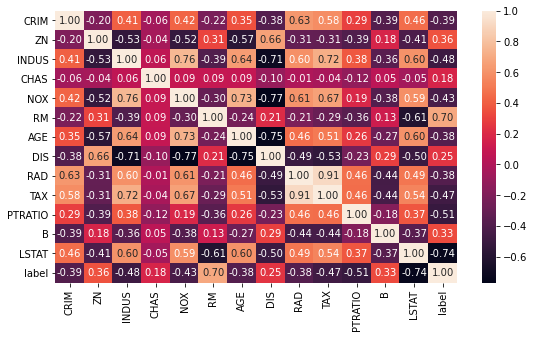

In [8]:
plt.figure(figsize=(9, 5))
sns.heatmap(df.corr(), annot=True, fmt='.2f');

In [79]:
df_final = df.drop(columns='TAX')

In [80]:
X_train, X_test, y_train, y_test = train_test_split(df_final.drop(columns='label'), df_final.label, 
                                                   shuffle=True, test_size=0.2)

In [81]:
X_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
397,7.67202,0.0,18.10,0.0,0.693,5.747,98.9,1.6334,24.0,20.2,393.10,19.92
126,0.38735,0.0,25.65,0.0,0.581,5.613,95.6,1.7572,2.0,19.1,359.29,27.26
189,0.08370,45.0,3.44,0.0,0.437,7.185,38.9,4.5667,5.0,15.2,396.90,5.39
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,15.2,395.60,12.43
489,0.18337,0.0,27.74,0.0,0.609,5.414,98.3,1.7554,4.0,20.1,344.05,23.97
...,...,...,...,...,...,...,...,...,...,...,...,...
197,0.04666,80.0,1.52,0.0,0.404,7.107,36.6,7.3090,2.0,12.6,354.31,8.61
353,0.01709,90.0,2.02,0.0,0.410,6.728,36.1,12.1265,5.0,17.0,384.46,4.50
454,9.51363,0.0,18.10,0.0,0.713,6.728,94.1,2.4961,24.0,20.2,6.68,18.71
438,13.67810,0.0,18.10,0.0,0.740,5.935,87.9,1.8206,24.0,20.2,68.95,34.02


In [82]:
y_train

397     8.5
126    15.7
189    34.9
6      22.9
489     7.0
       ... 
197    30.3
353    30.1
454    14.9
438     8.4
244    17.6
Name: label, Length: 404, dtype: float64

![](https://www.machinecurve.com/wp-content/uploads/2020/11/feed-3.jpg)

Generalization

K-fold cross validation

![](https://miro.medium.com/max/640/1*PdwlCactbJf8F8C7sP-3gw.png)

In [13]:
X_train.shape[0] == y_train.shape[0]

True

In [14]:
X_test.shape[0] == y_test.shape[0]

True

In [15]:
X_train.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
63,0.12650,25.0,5.13,0.0,0.453,6.762,43.4,7.9809,8.0,19.7,395.58,9.50
387,22.59710,0.0,18.10,0.0,0.700,5.000,89.5,1.5184,24.0,20.2,396.90,31.99
471,4.03841,0.0,18.10,0.0,0.532,6.229,90.7,3.0993,24.0,20.2,395.33,12.87
218,0.11069,0.0,13.89,1.0,0.550,5.951,93.8,2.8893,5.0,16.4,396.90,17.92
12,0.09378,12.5,7.87,0.0,0.524,5.889,39.0,5.4509,5.0,15.2,390.50,15.71


In [16]:
y_train.head(5)

63     25.0
387     7.4
471    19.6
218    21.5
12     21.7
Name: label, dtype: float64

In [17]:
X_test.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
340,0.06151,0.0,5.19,0.0,0.515,5.968,58.5,4.8122,5.0,20.2,396.90,9.29
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,20.1,395.09,18.06
157,1.22358,0.0,19.58,0.0,0.605,6.943,97.4,1.8773,5.0,14.7,363.43,4.59


In [18]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((404, 12), (404,), (102, 12), (102,))

### Modeling

![](https://upload.wikimedia.org/wikipedia/commons/thumb/6/62/CPT-OOP-objects_and_classes.svg/1280px-CPT-OOP-objects_and_classes.svg.png)

#### Sklearn

In [19]:
# Hyperparameters
linear = LinearRegression() # Class linear regression
linear.fit(X_train, y_train)   # training

LinearRegression()

In [20]:
linear  # Model

LinearRegression()

In [21]:
X_test.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT
340,0.06151,0.0,5.19,0.0,0.515,5.968,58.5,4.8122,5.0,20.2,396.90,9.29
488,0.15086,0.0,27.74,0.0,0.609,5.454,92.7,1.8209,4.0,20.1,395.09,18.06
157,1.22358,0.0,19.58,0.0,0.605,6.943,97.4,1.8773,5.0,14.7,363.43,4.59
13,0.62976,0.0,8.14,0.0,0.538,5.949,61.8,4.7075,4.0,21.0,396.90,8.26
103,0.21161,0.0,8.56,0.0,0.520,6.137,87.4,2.7147,5.0,20.9,394.47,13.44


In [22]:
pd.options.display.max_rows = 100

In [23]:
# Compair predicted values vs actual values
pd.DataFrame({'actual': y_test, 'predicted': linear.predict(X_test)}).head(100)

,actual,predicted
340,18.7,20.985669
488,15.2,14.631576
157,41.3,33.380313
13,20.4,19.932114
103,19.3,21.488076
180,39.8,34.424962
42,25.3,24.820139
204,50.0,41.937329
100,27.5,25.764266
235,24.0,25.321512


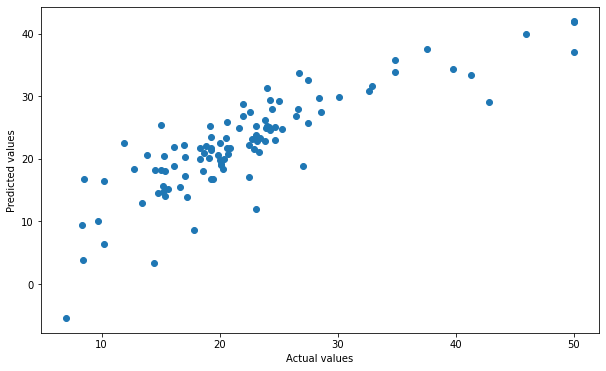

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear.predict(X_test))
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()

#### Evaluation

In [25]:
y_predicted = linear.predict(X_test)

In [26]:
y_test.shape, y_predicted.shape

((102,), (102,))

In [27]:
mean_squared_error(y_test, y_predicted)

22.31604522488519

In [28]:
mean_squared_error(y_test, y_predicted, squared=False)

4.723986158413802

In [29]:
mean_absolute_error(y_test, y_predicted)

3.4060279587667246

In [30]:
linear.coef_

array([-1.26598969e-01,  3.67685516e-02, -1.12298292e-01,  3.12826966e+00,
       -1.91385667e+01,  3.47794966e+00,  3.49716388e-03, -1.62533746e+00,
        1.71668453e-01, -9.42743838e-01,  1.01694033e-02, -5.82604147e-01])

In [31]:
linear.intercept_

37.85434716920958

In [32]:
y_train.iloc[0] - sum(linear.coef_ * X_train.iloc[0] + linear.intercept_)

-412.8968880886513

In [33]:
loss = 0
for i in range(X_train.shape[0]):
    loss += (y_train.iloc[i] - 
             sum(linear.coef_ * X_train.iloc[i] + linear.intercept_) )**2

loss / (2*X_train.shape[0])

86704.87670352751

In [34]:
X_train.shape[0]

404

In [35]:
np.argmax([1, 2, 3, 4])

3

In [36]:
np.max([1, 2, 3, 4])

4

### Gradient Descent

In [37]:
%config Completer.use_jedi = False

In [38]:
X_train['BIAS'] = 1
X_train.shape

(404, 13)

In [39]:
X_train.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,PTRATIO,B,LSTAT,BIAS
63,0.1265,25.0,5.13,0.0,0.453,6.762,43.4,7.9809,8.0,19.7,395.58,9.50,1
387,22.5971,0.0,18.10,0.0,0.700,5.000,89.5,1.5184,24.0,20.2,396.90,31.99,1


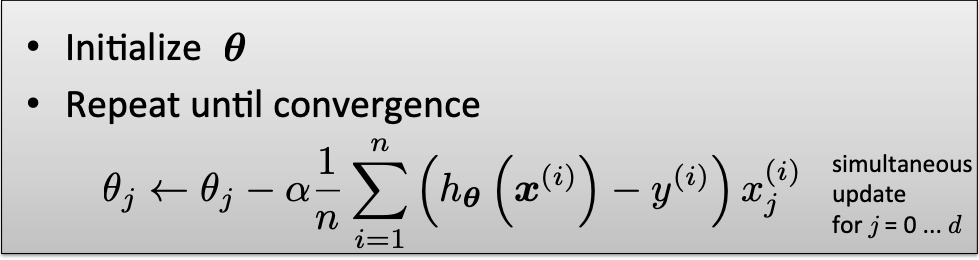

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)

In [42]:
theta = np.random.uniform(size=13)
num_loop = 2000
n = X_train.shape[0]
learning_rate = 0.001
e_squared = []

for loop in range(num_loop):
    error = (theta * X_train).sum(axis=1) - y_train
    for i in range(theta.shape[0]):
        theta[i] = theta[i] - learning_rate * (error * X_train.iloc[:, i]).sum() / n
    
    if loop % 100 == 0:
        mse = mean_squared_error(y_train, (theta * X_train).sum(axis=1))
        e_squared.append(mse)
        print(f'MEAN SQUARE ERROR AT {loop}: {mse}')

MEAN SQUARE ERROR AT 0: 508.3355412644164
MEAN SQUARE ERROR AT 100: 367.44349605956324
MEAN SQUARE ERROR AT 200: 277.00260007437424
MEAN SQUARE ERROR AT 300: 219.3154987171446
MEAN SQUARE ERROR AT 400: 182.80467589758928
MEAN SQUARE ERROR AT 500: 159.91277778479548
MEAN SQUARE ERROR AT 600: 145.7202534428726
MEAN SQUARE ERROR AT 700: 137.03582211874505
MEAN SQUARE ERROR AT 800: 131.79850344242408
MEAN SQUARE ERROR AT 900: 128.68486193907506
MEAN SQUARE ERROR AT 1000: 126.85134812567134
MEAN SQUARE ERROR AT 1100: 125.76551921125798
MEAN SQUARE ERROR AT 1200: 125.0956868180036
MEAN SQUARE ERROR AT 1300: 124.63893501304479
MEAN SQUARE ERROR AT 1400: 124.27430592051935
MEAN SQUARE ERROR AT 1500: 123.93246769132516
MEAN SQUARE ERROR AT 1600: 123.57615606585755
MEAN SQUARE ERROR AT 1700: 123.18764100061398
MEAN SQUARE ERROR AT 1800: 122.76076009436692
MEAN SQUARE ERROR AT 1900: 122.29590925008635


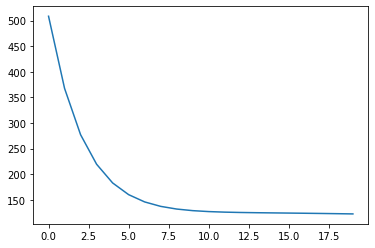

In [43]:
plt.plot(e_squared)
plt.show()

In [44]:
theta

array([0.66356394, 2.14408651, 2.94447496, 1.3913306 , 2.97259553,
       5.56524243, 5.48524466, 3.61746803, 3.02001836, 5.18873669,
       8.83383583, 3.06083866, 0.46734674])

In [45]:
X_test, y_test

(         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS   RAD  PTRATIO  \
 340   0.06151   0.0   5.19   0.0  0.515  5.968  58.5  4.8122   5.0     20.2   
 488   0.15086   0.0  27.74   0.0  0.609  5.454  92.7  1.8209   4.0     20.1   
 157   1.22358   0.0  19.58   0.0  0.605  6.943  97.4  1.8773   5.0     14.7   
 13    0.62976   0.0   8.14   0.0  0.538  5.949  61.8  4.7075   4.0     21.0   
 103   0.21161   0.0   8.56   0.0  0.520  6.137  87.4  2.7147   5.0     20.9   
 ..        ...   ...    ...   ...    ...    ...   ...     ...   ...      ...   
 293   0.08265   0.0  13.92   0.0  0.437  6.127  18.4  5.5027   4.0     16.0   
 200   0.01778  95.0   1.47   0.0  0.403  7.135  13.9  7.6534   3.0     17.0   
 149   2.73397   0.0  19.58   0.0  0.871  5.597  94.9  1.5257   5.0     14.7   
 394  13.35980   0.0  18.10   0.0  0.693  5.887  94.7  1.7821  24.0     20.2   
 497   0.26838   0.0   9.69   0.0  0.585  5.794  70.6  2.8927   6.0     19.2   
 
           B  LSTAT  
 340  396.90   9

In [46]:
X_test['BIAS'] = 1

In [47]:
model = theta * X_test

In [48]:
predicted = (theta * X_test).sum(axis=1)

In [49]:
mean_squared_error(y_test, predicted)

14713055.839702157

In [50]:
mean_absolute_error(y_test, predicted)

3757.301639125295

![](https://datalya.com/blog/content/4-machine-learning/11-machine-learning-vs-traditional-programming-paradigm/ml_vs_traditional_paradigm.png)

### Normalization

#### Simple normalization

$$X_{i} = \frac{X_i}{\text{max{X_i}}}$$

MinMaxScaler

![](https://cdn.wallstreetmojo.com/wp-content/uploads/2019/04/Normalization-Formula.jpg)

#### Standardization

![](https://www.oreilly.com/library/view/hands-on-machine-learning/9781788393485/assets/7a9d8cb9-10f7-43b5-b52f-865fbbb0b69e.png)

In [51]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.001320,0.250,0.171188,0.0,0.132780,0.613336,0.417096,0.623021,0.304348,0.755319,0.996672,0.214404,0.0
1,0.253892,0.000,0.646628,0.0,0.645228,0.275723,0.891864,0.035355,1.000000,0.808511,1.000000,0.834989,0.0
2,0.045290,0.000,0.646628,0.0,0.296680,0.511209,0.904222,0.179114,1.000000,0.808511,0.996041,0.307395,0.0
3,0.001142,0.000,0.492302,1.0,0.334025,0.457942,0.936148,0.160018,0.173913,0.404255,1.000000,0.446744,0.0
4,0.000952,0.125,0.271628,0.0,0.280083,0.446062,0.371782,0.392956,0.173913,0.276596,0.983862,0.385762,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.016346,0.000,0.700880,0.0,0.448133,0.752635,0.905252,0.076503,0.173913,0.223404,0.943341,0.000000,0.0
400,0.001331,0.000,0.236437,0.0,0.122407,0.614869,0.000000,0.417509,0.086957,0.563830,0.971027,0.085817,0.0
401,0.032764,0.000,0.700880,0.0,0.448133,0.486683,0.927909,0.104920,0.173913,0.223404,0.604771,0.222958,0.0
402,0.001525,0.000,0.350073,0.0,0.327801,0.415788,0.641607,0.148187,0.217391,0.553191,0.986384,0.327815,0.0


In [52]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [53]:
minmax = MinMaxScaler()
pd.DataFrame(minmax.fit_transform(X_train), columns=X_train.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.001320,0.250,0.171188,0.0,0.132780,0.613336,0.417096,0.623021,0.304348,0.755319,0.996672,0.214404,0.0
1,0.253892,0.000,0.646628,0.0,0.645228,0.275723,0.891864,0.035355,1.000000,0.808511,1.000000,0.834989,0.0
2,0.045290,0.000,0.646628,0.0,0.296680,0.511209,0.904222,0.179114,1.000000,0.808511,0.996041,0.307395,0.0
3,0.001142,0.000,0.492302,1.0,0.334025,0.457942,0.936148,0.160018,0.173913,0.404255,1.000000,0.446744,0.0
4,0.000952,0.125,0.271628,0.0,0.280083,0.446062,0.371782,0.392956,0.173913,0.276596,0.983862,0.385762,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.016346,0.000,0.700880,0.0,0.448133,0.752635,0.905252,0.076503,0.173913,0.223404,0.943341,0.000000,0.0
400,0.001331,0.000,0.236437,0.0,0.122407,0.614869,0.000000,0.417509,0.086957,0.563830,0.971027,0.085817,0.0
401,0.032764,0.000,0.700880,0.0,0.448133,0.486683,0.927909,0.104920,0.173913,0.223404,0.604771,0.222958,0.0
402,0.001525,0.000,0.350073,0.0,0.327801,0.415788,0.641607,0.148187,0.217391,0.553191,0.986384,0.327815,0.0


In [54]:
standard = StandardScaler()
pd.DataFrame(standard.fit_transform(X_train), columns=X_train.columns)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.400325,0.576590,-0.873405,-0.267615,-0.895862,0.668815,-0.893302,2.027131,-0.191632,0.539060,0.423620,-0.439536,0.0
1,2.066140,-0.497075,1.006942,-0.267615,1.264262,-1.872958,0.740360,-1.079241,1.635377,0.769174,0.438158,2.713651,0.0
2,0.029062,-0.497075,1.006942,-0.267615,-0.204972,-0.100064,0.782885,-0.319339,1.635377,0.769174,0.420867,0.032951,0.0
3,-0.402060,-0.497075,0.396590,3.736705,-0.047554,-0.501093,0.892741,-0.420282,-0.534197,-0.979694,0.438158,0.740981,0.0
4,-0.403916,0.039757,-0.476169,-0.267615,-0.274936,-0.590531,-1.049227,0.811019,-0.534197,-1.531969,0.367672,0.431131,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,-0.253586,-0.497075,1.221507,-0.267615,0.433445,1.717548,0.786429,-0.861735,-0.534197,-1.762083,0.190688,-1.528921,0.0
400,-0.400222,-0.497075,-0.615347,-0.267615,-0.939589,0.680355,-2.328516,0.940802,-0.762573,-0.289352,0.311614,-1.092886,0.0
401,-0.093260,-0.497075,1.221507,-0.267615,0.433445,-0.284711,0.864391,-0.711523,-0.534197,-1.762083,-1.288075,-0.396073,0.0
402,-0.398320,-0.497075,-0.165919,-0.267615,-0.073791,-0.818454,-0.120768,-0.482818,-0.420009,-0.335374,0.378686,0.136702,0.0


![](https://nvsyashwanth.github.io/machinelearningmaster/assets/images/bias_variance.jpg)

![](https://devblogs.microsoft.com/premier-developer/wp-content/uploads/sites/31/2020/08/word-image-1.png)

![](https://www.researchgate.net/profile/Frank-Emmert-Streib/publication/330380054/figure/tbl2/AS:715185664823298@1547524958338/Overview-of-regularization-or-penalty-terms-and-methods-utilizing-them.png)

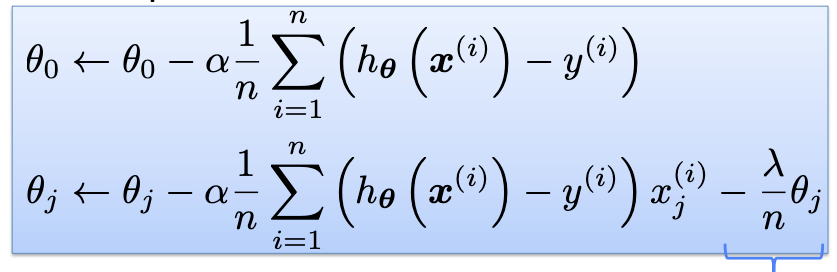

In [62]:
theta = np.random.uniform(size=13)
num_loop = 2000
n = X_train.shape[0]
learning_rate = 0.001
lamb = -0.1
e_squared = []

for loop in range(num_loop):
    error = (theta * X_train).sum(axis=1) - y_train
    for i in range(theta.shape[0]):
        theta[i] = theta[i] - (learning_rate * (error * X_train.iloc[:, i]).sum() / n) - (lamb / n * theta[i])
    
    if loop % 100 == 0:
        mse = mean_squared_error(y_train, (theta * X_train).sum(axis=1))
        e_squared.append(mse)
        print(f'MEAN SQUARE ERROR AT {loop}: {mse}')

MEAN SQUARE ERROR AT 0: 535.2021295871251
MEAN SQUARE ERROR AT 100: 383.0665767857785
MEAN SQUARE ERROR AT 200: 283.7737343982838
MEAN SQUARE ERROR AT 300: 220.02288083519144
MEAN SQUARE ERROR AT 400: 179.99916294267152
MEAN SQUARE ERROR AT 500: 155.6620973223962
MEAN SQUARE ERROR AT 600: 141.56351923594906
MEAN SQUARE ERROR AT 700: 134.03193471052174
MEAN SQUARE ERROR AT 800: 130.6103192554309
MEAN SQUARE ERROR AT 900: 129.66912749898017
MEAN SQUARE ERROR AT 1000: 130.14034324408246
MEAN SQUARE ERROR AT 1100: 131.33507630755804
MEAN SQUARE ERROR AT 1200: 132.81876702043354
MEAN SQUARE ERROR AT 1300: 134.3260628197273
MEAN SQUARE ERROR AT 1400: 135.70297361592253
MEAN SQUARE ERROR AT 1500: 136.86774912845928
MEAN SQUARE ERROR AT 1600: 137.7845759887935
MEAN SQUARE ERROR AT 1700: 138.44602827408553
MEAN SQUARE ERROR AT 1800: 138.8614739830883
MEAN SQUARE ERROR AT 1900: 139.0495162632865


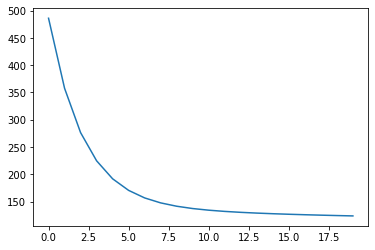

In [61]:
plt.plot(e_squared);

In [63]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [66]:
X_train

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.001320,0.250,0.171188,0.0,0.132780,0.613336,0.417096,0.623021,0.304348,0.755319,0.996672,0.214404,0.0
1,0.253892,0.000,0.646628,0.0,0.645228,0.275723,0.891864,0.035355,1.000000,0.808511,1.000000,0.834989,0.0
2,0.045290,0.000,0.646628,0.0,0.296680,0.511209,0.904222,0.179114,1.000000,0.808511,0.996041,0.307395,0.0
3,0.001142,0.000,0.492302,1.0,0.334025,0.457942,0.936148,0.160018,0.173913,0.404255,1.000000,0.446744,0.0
4,0.000952,0.125,0.271628,0.0,0.280083,0.446062,0.371782,0.392956,0.173913,0.276596,0.983862,0.385762,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.016346,0.000,0.700880,0.0,0.448133,0.752635,0.905252,0.076503,0.173913,0.223404,0.943341,0.000000,0.0
400,0.001331,0.000,0.236437,0.0,0.122407,0.614869,0.000000,0.417509,0.086957,0.563830,0.971027,0.085817,0.0
401,0.032764,0.000,0.700880,0.0,0.448133,0.486683,0.927909,0.104920,0.173913,0.223404,0.604771,0.222958,0.0
402,0.001525,0.000,0.350073,0.0,0.327801,0.415788,0.641607,0.148187,0.217391,0.553191,0.986384,0.327815,0.0


In [83]:
linear = LinearRegression()
linear.fit(X_train, y_train)

ridge = Ridge()
ridge.fit(X_train, y_train)

lasso = Lasso()
lasso.fit(X_train, y_train)

elastic = ElasticNet()
elastic.fit(X_train, y_train)

print(f"Linear: {mean_squared_error(y_test, linear.predict(X_test))}")
print(f"Lasso: {mean_squared_error(y_test, lasso.predict(X_test))}")
print(f"Ridge: {mean_squared_error(y_test, ridge.predict(X_test))}")
print(f"Elastic: {mean_squared_error(y_test, elastic.predict(X_test))}")

print('='*50)
print(f"Linear: {mean_absolute_error(y_test, linear.predict(X_test))}")
print(f"Lasso: {mean_absolute_error(y_test, lasso.predict(X_test))}")
print(f"Ridge: {mean_absolute_error(y_test, ridge.predict(X_test))}")
print(f"Elastic: {mean_absolute_error(y_test, elastic.predict(X_test))}")

print('='*50)
print(f"Linear: {r2_score(y_test, linear.predict(X_test)) * 100}")
print(f"Lasso: {r2_score(y_test, lasso.predict(X_test)) * 100}")
print(f"Ridge: {r2_score(y_test, ridge.predict(X_test))* 100}")
print(f"Elastic: {r2_score(y_test, elastic.predict(X_test)) * 100}")

Linear: 35.286324344819874
Lasso: 36.471812710632825
Ridge: 35.42074618687358
Elastic: 36.00045005905215
Linear: 3.91938909686271
Lasso: 4.252302852664076
Ridge: 3.863594616854702
Elastic: 4.225828872201798
Linear: 65.46586522471374
Lasso: 64.3056476118093
Ridge: 65.33430881875708
Elastic: 64.76696234605741
